In [30]:
from analyzer import RESDIR, enumerator, print_options, cprint, oprint
import numpy as np
import pandas as pd


to_plot = {
    "FO-maml-1step": ("MAML", "First-order"), 
    "SO-maml-1step": ("MAML", "Second-order"),
    "turtleFO-turtle1-raw_grads-relu": ("0-HL", "First-order"),
    "turtleSO-turtle1-raw_grads":  ("0-HL", "Second-order"),
    "turtleFO-turtle20-1-raw_grads-relu":  ("1-HL", "First-order"),
    "turtleSO-turtle20-1-raw_grads-relu":  ("1-HL", "Second-order"),
    "turtleFO-turtle20-20-1-raw_grads-relu":  ("2-HL", "First-order"),
    "turtleSO-turtle20-20-1-raw_grads-relu": ("2-HL", "Second-order"),
    "turtleFO-turtle20-20-20-1-raw_grads-relu": ("3-HL", "First-order"),
    "turtleSO-turtle20-20-20-1-raw_grads-relu": ("3-HL", "Second-order"),
    "turtleFO-turtle20-20-20-20-1-raw_grads-relu": ("4-HL", "First-order"),
    "turtleSO-turtle20-20-20-20-1-raw_grads-relu": ("4-HL", "Second-order"),
    "turtleFO-turtle-5HL-raw_grads-relu": ("5-HL", "First-order"),
    "turtleSO-turtle20-20-20-20-20-1-raw_grads-relu": ("5-HL", "Second-order"),
    "turtleFO-turtle-6HL-raw_grads-relu": ("6-HL", "First-order"),
    "turtleSO-turtle-6HL-raw_grads-relu": ("6-HL", "Second-order"),
    "turtleFO-turtle-7HL-raw_grads-relu": ("7-HL", "First-order"),
    "turtleSO-turtle-7HL-raw_grads-relu": ("7-HL", "Second-order")
}#TODO: First-order for 5,6,7 HL

PROBLEM = "k5test50"

cdir = RESDIR + "sine/"
file = "curves" # Learning curve files should have this in their filename
markers = ['o', 'v', '^', 's', 'p', 'P', 'D']
mc = 0 # Index for markers

# Generate options for algorithms to include in the plot
options = [x for x in enumerator(cdir, file)]
rd_options = [(x[0],x[1], x[2].split('/')[-1]) for x in options]
indices = []
count = 0
for alg, problem, path in rd_options:
    if alg in to_plot and problem==PROBLEM:
        indices.append(count)
        print("HERE:",path)
    count += 1
        
subset = np.array(options)[np.array(indices)]


fdf = pd.DataFrame(columns=["Algorithm", "Gradients", "MSE"])

sindex = 0 # Index of first episode to plot
upper_bounds = []
lower_bounds = []
lcurves = []
axes = []
labels = []
# All learning curves of interest
for alg, problem, path in subset:
    # Either the user inputs the label he/she wishes or we use the 
    # algorithm filename by default
    label = to_plot[alg][0]

    # Construct learning curve from file and infer error bounds 
    df = pd.read_csv(path, header=None)
    best_perfs = df.min(axis=1) # List of all best validation performances per run
    alg_name = [to_plot[alg][0] for _ in range(len(best_perfs))]
    order = [to_plot[alg][1] for _ in range(len(best_perfs))]
    
    
    perf_col = list(fdf["MSE"]) + list(best_perfs)
    alg_col = list(fdf["Algorithm"]) + alg_name
    order_col = list(fdf["Gradients"]) + order
    
    fdf = pd.DataFrame(columns=["Algorithm"])
    
    fdf["MSE"] = pd.Series(perf_col)
    fdf["Algorithm"] = pd.Series(alg_col)
    fdf["Gradients"] = pd.Series(order_col)
    
display(fdf)
    


[*] Processing /runs/ folder in ./results/sine/k5test50\FO-maml-5step
[*] Processing /runs/ folder in ./results/sine/k5test50\SO-maml-5step
[*] Processing /runs/ folder in ./results/sine/k5test50\test
[*] Processing /runs/ folder in ./results/sine/k5test50\tttest
[*] Processing /runs/ folder in ./results/sine/k5test50\ttttest
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO-6HL-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO-7HL-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-20-20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-20-20-20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtle

,Algorithm,MSE,Gradients
0,MAML,0.670712,First-order
1,MAML,0.774926,First-order
2,MAML,0.701676,First-order
3,MAML,0.682712,First-order
4,MAML,0.709306,First-order
...,...,...,...
445,5-HL,0.577073,Second-order
446,5-HL,0.579233,Second-order
447,5-HL,0.615329,Second-order
448,5-HL,0.610419,Second-order


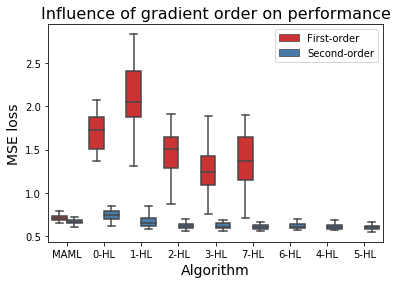

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,8))
plt.title("Influence of gradient order on performance", fontsize=16)
ax = sns.boxplot(x="Algorithm", y="MSE", hue="Gradients", data=fdf, palette="Set1", showfliers=False)
ax.set_xlabel("Algorithm",fontsize=14)
ax.set_ylabel("MSE loss", fontsize=14)
plt.legend()

In [26]:
import seaborn as sns


In [27]:
tips = sns.load_dataset("tips")

In [28]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 5-step

In [24]:
from analyzer import RESDIR, enumerator, print_options, cprint, oprint
import numpy as np
import pandas as pd


to_plot = {
    "FO-maml-5step": ("MAML", "First-order"), 
    "SO-maml-5step": ("MAML", "Second-order"),
    "turtleFO1-5step-raw_grads": ("0-HL", "First-order"),
    "turtleSO1-5step-raw_grads":  ("0-HL", "Second-order"),
    "turtleFO20-1-5step-raw_grads":  ("1-HL", "First-order"),
    "turtleSO20-1-5step-raw_grads":  ("1-HL", "Second-order"),
    "turtleFO20-20-1-5step-raw_grads":  ("2-HL", "First-order"),
    "turtleSO20-20-1-5step-raw_grads": ("2-HL", "Second-order"),
    "turtleFO20-20-20-1-5step-raw_grads": ("3-HL", "First-order"), 
    "turtleSO20-20-20-1-5step-raw_grads": ("3-HL", "Second-order"),
    "turtleFO20-20-20-20-1-5step-raw_grads": ("4-HL", "First-order"),
    "turtleSO20-20-20-20-1-5step-raw_grads": ("4-HL", "Second-order"),
    "turtleFO-5HL-5step-raw_grads": ("5-HL", "First-order"),
    "turtleSO20-20-20-20-20-1-5step-raw_grads": ("5-HL", "Second-order"),
    "turtleFO-6HL-5step-raw_grads": ("6-HL", "First-order"),
    "turtleSO20-20-20-20-20-20-1-5step-raw_grads": ("6-HL", "Second-order"),
    "turtleFO-7HL-5step-raw_grads": ("7-HL", "First-order"),
    "turtleSO-7HL-5step-raw_grads": ("7-HL", "Second-order"),
}

PROBLEM = "k5test50"

cdir = RESDIR + "sine/"
file = "curves" # Learning curve files should have this in their filename
markers = ['o', 'v', '^', 's', 'p', 'P', 'D']
mc = 0 # Index for markers

# Generate options for algorithms to include in the plot
options = [x for x in enumerator(cdir, file)]
rd_options = [(x[0],x[1], x[2].split('/')[-1]) for x in options]

indices = []
count = 0
for alg, problem, path in rd_options:
    if alg in to_plot and problem==PROBLEM:
        indices.append(count)
    count += 1
        
subset = np.array(options)[np.array(indices)]


fdf = pd.DataFrame(columns=["Algorithm", "Gradients", "MSE"])

sindex = 0 # Index of first episode to plot
upper_bounds = []
lower_bounds = []
lcurves = []
axes = []
labels = []
# All learning curves of interest
for alg, problem, path in subset:
    # Either the user inputs the label he/she wishes or we use the 
    # algorithm filename by default
    label = to_plot[alg][0]

    # Construct learning curve from file and infer error bounds 
    df = pd.read_csv(path, header=None)
    best_perfs = df.min(axis=1) # List of all best validation performances per run
    alg_name = [to_plot[alg][0] for _ in range(len(best_perfs))]
    order = [to_plot[alg][1] for _ in range(len(best_perfs))]
    
    perf_col = list(fdf["MSE"]) + list(best_perfs)
    alg_col = list(fdf["Algorithm"]) + alg_name
    order_col = list(fdf["Gradients"]) + order
    
    fdf = pd.DataFrame(columns=["Algorithm"])
    
    fdf["MSE"] = pd.Series(perf_col)
    fdf["Algorithm"] = pd.Series(alg_col)
    fdf["Gradients"] = pd.Series(order_col)
    
display(fdf)
    


[*] Processing /runs/ folder in ./results/sine/k5test50\FO-maml-5step
[*] Processing /runs/ folder in ./results/sine/k5test50\SO-maml-5step
[*] Processing /runs/ folder in ./results/sine/k5test50\test
[*] Processing /runs/ folder in ./results/sine/k5test50\tttest
[*] Processing /runs/ folder in ./results/sine/k5test50\ttttest
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO-6HL-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO-7HL-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-20-20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtleFO20-20-20-20-1-5step-raw_grads
[*] Processing /runs/ folder in ./results/sine/k5test50\turtle

,Algorithm,MSE,Gradients
0,MAML,0.533184,First-order
1,MAML,0.516819,First-order
2,MAML,0.550388,First-order
3,MAML,0.507710,First-order
4,MAML,0.495764,First-order
...,...,...,...
511,6-HL TURTLE,0.362459,Second-order
512,6-HL TURTLE,0.363565,Second-order
513,6-HL TURTLE,0.359165,Second-order
514,6-HL TURTLE,0.377593,Second-order


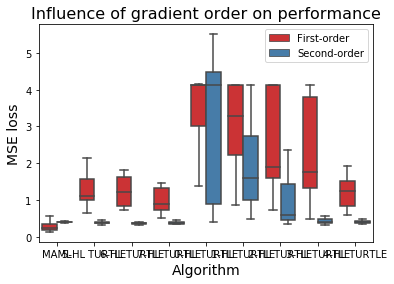

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,8))
plt.title("Influence of gradient order on performance", fontsize=16)
ax = sns.boxplot(x="Algorithm", y="MSE", hue="Gradients", data=fdf, palette="Set1", showfliers=False)
ax.set_xlabel("Algorithm",fontsize=14)
ax.set_ylabel("MSE loss", fontsize=14)
plt.legend()